# Semana 6 do Aceleradev DS Codenation

### Professor: Túlio Vieira de Souza | Tema: Dimensionalidade

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as sct
import missingno as msn
import yellowbrick.features as ybf
import yellowbrick.target as ybt
import yellowbrick.model_selection as ybm
import sklearn as skl

/home/mikael/projetos_python/aceleradev/venv/lib/python3.8/site-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


### Machine Learning Canvas

**Objetivo:** Tentar extrair informações relevante do time, pois é muito dificil ter conhecimento profundo sobre cada particularidade do problema à primeira vista. De maneira visual, o **ML Canvas** ajuda organizar melhor as idéias sobre o problema, dar um norte.

**ML task:** define o tipo de problema (Regressão, Classificação, ...)

**Value Propositions:** define o objetivo em se adotar um modelo de ML para resolver o problema. "Eu quero criar um modelo que prevê tal coisa por causa disso, disso e daquilo", "Meu objetivo com o modelo é esse, esse e esse..."

**Making Predictions:** define quantas vezes é necessário fazer a previsão do objeto de estudo, ou o momento que é pertimente fazer as previsões com o modelo

**Data Source:** Quais fontes de dados eu tenho (independente se são fontes internas ou externas)? Essas fontes são atualizáveis? Se eu modificar algo na fonte, tem histórico?

**Collecting Data:** Como os dados são coletados das suas fontes? Qual a complexidade para extrai-los?

**Features:** Quais variáveis são as mais relevantes dos meus dados?

**Building Models:** Aspectos pertinentes à contrução do modelo de ML: metodoligias, abordagens utilizadas, embasamento teórico

**Offline Evaluations:** O que é necessário observar nas métricas do modelo ($R^2$, map, olhar os hitogramas) antes de colocá-lo em produção. Também é necessário checar as métricas do negócio: "O que eu espero que o modelo melhore no meu negócio". Também temos que checar as métricas do modelo já em produção, se ele compre o que se exige dele, e se cumpre bem.

### Mapas Mentais

[como fazer seu próprio mapa mental](www.mindmeinster.com)

**Objetivo:** Propiciar que se levantem as *features* necessárias para o modelo. O desenho do mapa mental vai de encontro com alguns tópicos do ML canvas, como: Features e Data Source.

### Crisp-dm

**Objetivo:**

### Design Sprint

**Objetivo:**

### Dataset House Pricing 

In [2]:
df = pd.read_csv('train.csv')

In [3]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

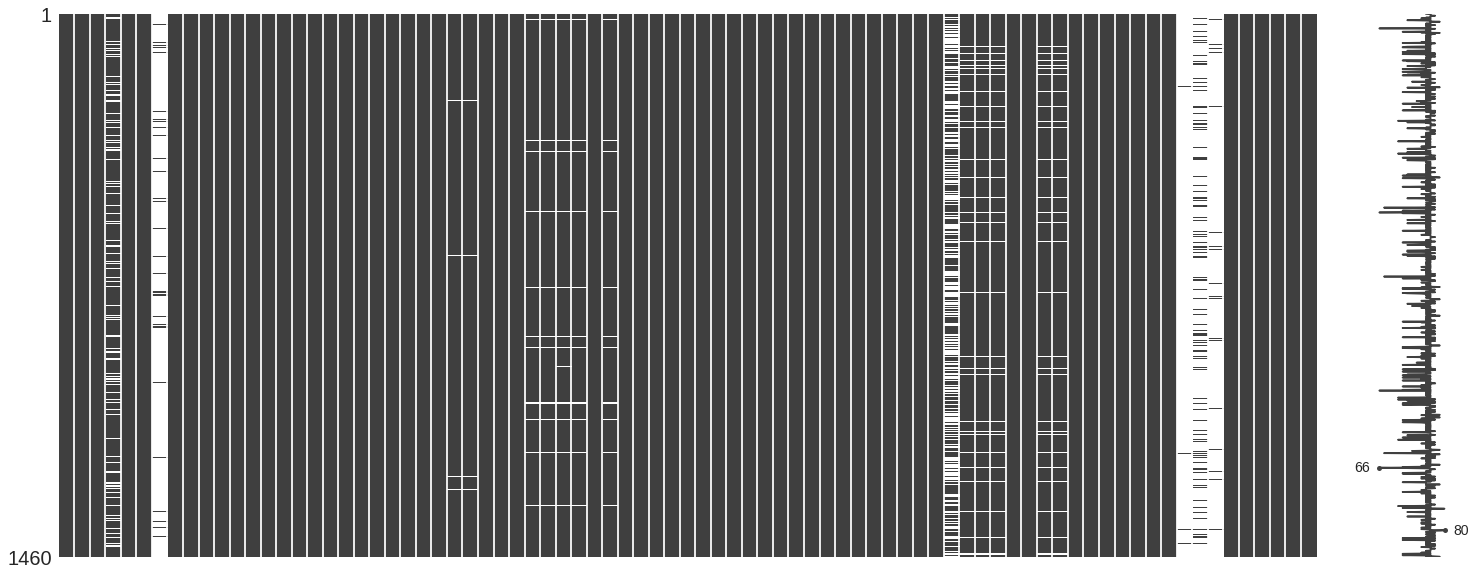

In [5]:
msn.matrix(df);

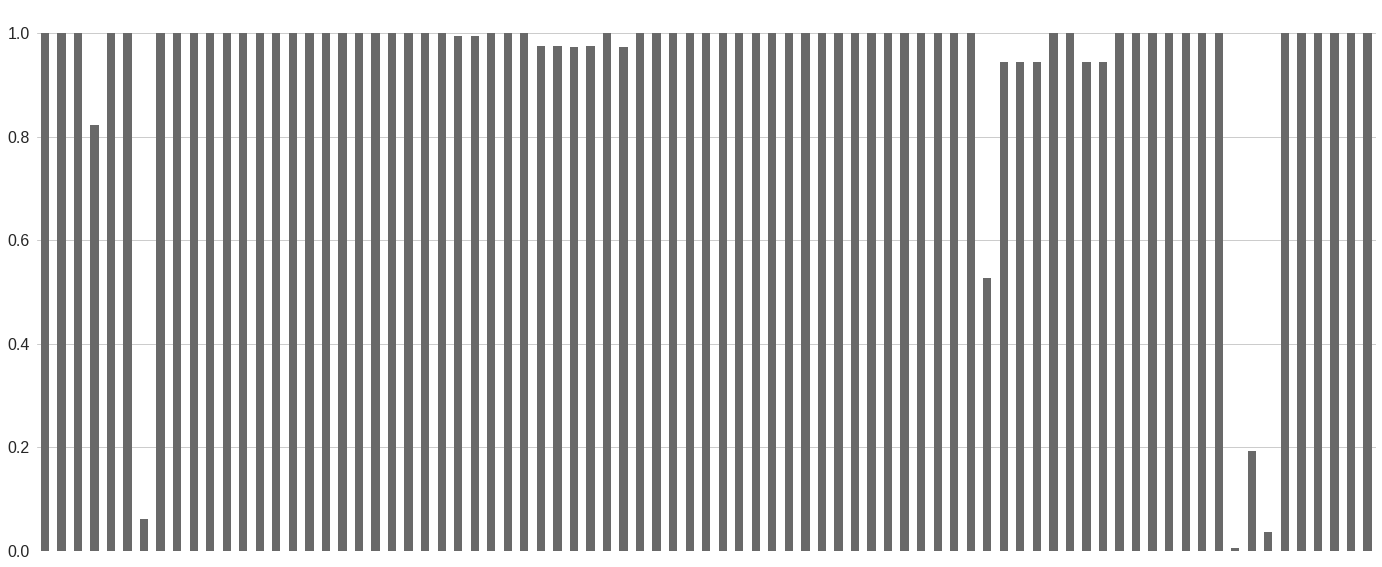

In [6]:
msn.bar(df);

In [7]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [8]:
total = df.shape[0]
colunas = df.columns
print('Porcentagem de faltantes por feature \n')
for i in colunas:
    print(f'{i:>14}: ',(df[i].isna().sum() / total).round(2))

Porcentagem de faltantes por feature 

            Id:  0.0
    MSSubClass:  0.0
      MSZoning:  0.0
   LotFrontage:  0.18
       LotArea:  0.0
        Street:  0.0
         Alley:  0.94
      LotShape:  0.0
   LandContour:  0.0
     Utilities:  0.0
     LotConfig:  0.0
     LandSlope:  0.0
  Neighborhood:  0.0
    Condition1:  0.0
    Condition2:  0.0
      BldgType:  0.0
    HouseStyle:  0.0
   OverallQual:  0.0
   OverallCond:  0.0
     YearBuilt:  0.0
  YearRemodAdd:  0.0
     RoofStyle:  0.0
      RoofMatl:  0.0
   Exterior1st:  0.0
   Exterior2nd:  0.0
    MasVnrType:  0.01
    MasVnrArea:  0.01
     ExterQual:  0.0
     ExterCond:  0.0
    Foundation:  0.0
      BsmtQual:  0.03
      BsmtCond:  0.03
  BsmtExposure:  0.03
  BsmtFinType1:  0.03
    BsmtFinSF1:  0.0
  BsmtFinType2:  0.03
    BsmtFinSF2:  0.0
     BsmtUnfSF:  0.0
   TotalBsmtSF:  0.0
       Heating:  0.0
     HeatingQC:  0.0
    CentralAir:  0.0
    Electrical:  0.0
      1stFlrSF:  0.0
      2ndFlrSF:  0.0
  LowQu

In [9]:
cons = pd.DataFrame({'colunas': df.columns,
                    'tipo': df.dtypes,
                    'missing': df.isna().sum(),
                    'size': df.shape[0],
                    'unicos': df.nunique()})

In [10]:
cons['missing %'] = (100 * cons['missing']/cons['size']).round(2)

In [11]:
cons.head()

,colunas,tipo,missing,size,unicos,missing %
Id,Id,int64,0,1460,1460,0.00
MSSubClass,MSSubClass,int64,0,1460,15,0.00
MSZoning,MSZoning,object,0,1460,5,0.00
LotFrontage,LotFrontage,float64,259,1460,110,17.74
LotArea,LotArea,int64,0,1460,1073,0.00


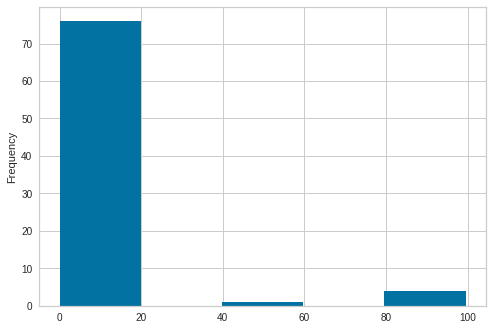

In [12]:
cons['missing %'].plot(kind='hist', bins=5);

### Removendo Colunas

Por escolha, decidiu-se manter as colunas completas apenas, num novo *dataframe* conhecido como **base line**, que é um modelo base usado para comparar com os experimentos de *feature engeneering*

In [13]:
print('Número de features com 20%, ou menos, de dados faltantes: ', cons[cons['missing %'] < 20].shape[0])
print('Número de features com 0% de dados faltantes: ', cons[cons['missing %'] == 0].shape[0])

Número de features com 20%, ou menos, de dados faltantes:  76
Número de features com 0% de dados faltantes:  62


In [14]:
cons[cons['missing %'] == 0]['tipo'].value_counts()

int64     35
object    27
Name: tipo, dtype: int64

In [15]:
cons['completa'] = list('completa' if x == 0 else 'incompleta' for x in cons['missing'])

In [16]:
cons.head()

,colunas,tipo,missing,size,unicos,missing %,completa
Id,Id,int64,0,1460,1460,0.00,completa
MSSubClass,MSSubClass,int64,0,1460,15,0.00,completa
MSZoning,MSZoning,object,0,1460,5,0.00,completa
LotFrontage,LotFrontage,float64,259,1460,110,17.74,incompleta
LotArea,LotArea,int64,0,1460,1073,0.00,completa


In [17]:
completas_numericas = cons[(cons['completa'] == 'completa') & (cons['tipo'] == 'int64')]

In [18]:
completas_numericas.head()

,colunas,tipo,missing,size,unicos,missing %,completa
Id,Id,int64,0,1460,1460,0.0,completa
MSSubClass,MSSubClass,int64,0,1460,15,0.0,completa
LotArea,LotArea,int64,0,1460,1073,0.0,completa
OverallQual,OverallQual,int64,0,1460,10,0.0,completa
OverallCond,OverallCond,int64,0,1460,9,0.0,completa


**Nota:** A idéia em trabalhar somente com dados sem *Nan* e numéricos é começar a preparar o modelo com o mínimo possível, pois se for possível gerar um modelo bom somente com essas features, ótimo. Senão, como é um **base line**, podemos modificar, acrescentar, retirar features até que tenhamos uma base suficientemente boa

In [19]:
completas_numericas = completas_numericas.loc['MSSubClass':, :]
completas_numericas.head()

,colunas,tipo,missing,size,unicos,missing %,completa
MSSubClass,MSSubClass,int64,0,1460,15,0.0,completa
LotArea,LotArea,int64,0,1460,1073,0.0,completa
OverallQual,OverallQual,int64,0,1460,10,0.0,completa
OverallCond,OverallCond,int64,0,1460,9,0.0,completa
YearBuilt,YearBuilt,int64,0,1460,112,0.0,completa


MSSubClass


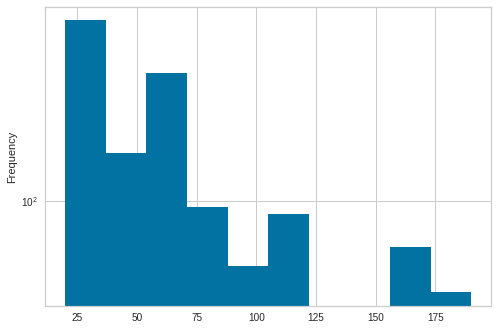

LotArea


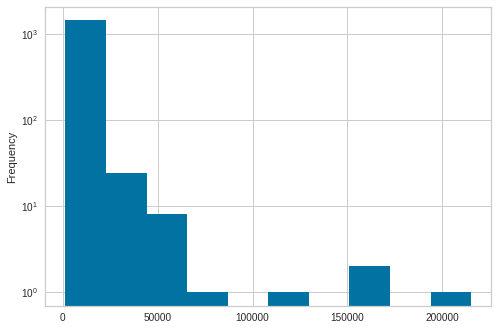

OverallQual


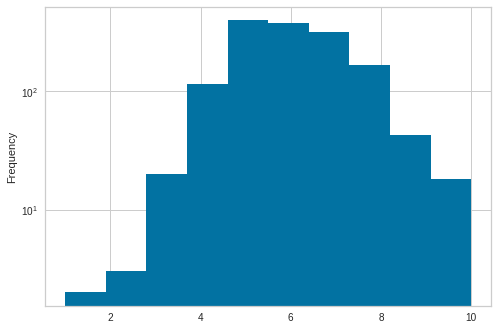

OverallCond


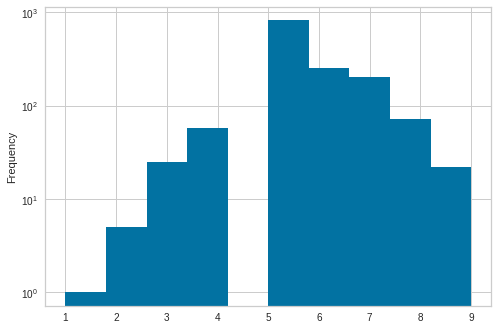

YearBuilt


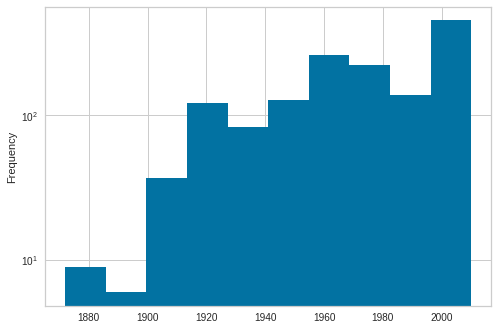

YearRemodAdd


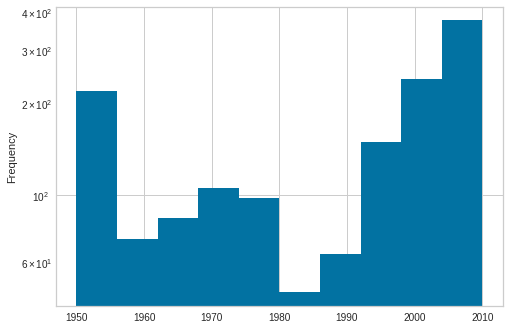

BsmtFinSF1


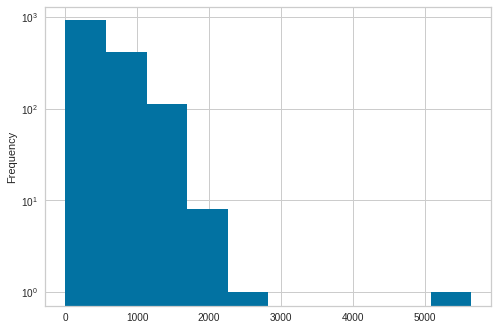

BsmtFinSF2


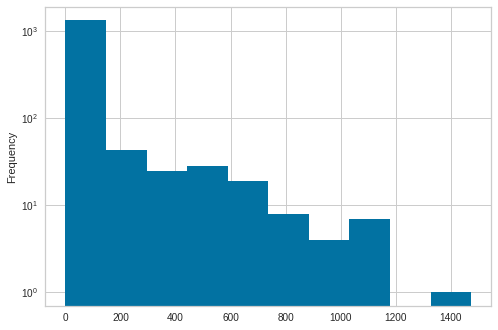

BsmtUnfSF


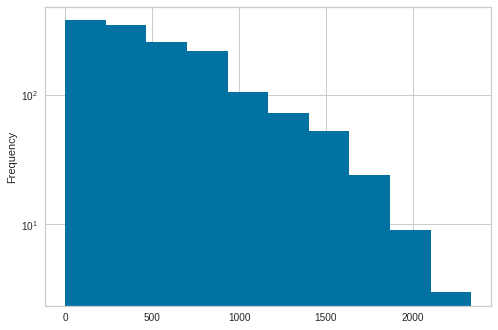

TotalBsmtSF


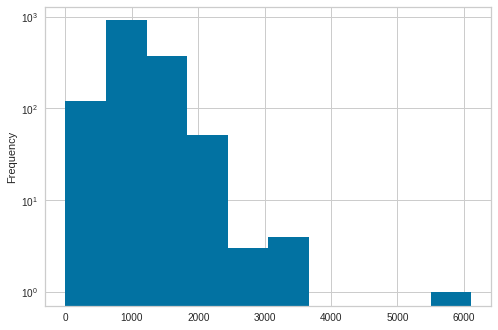

1stFlrSF


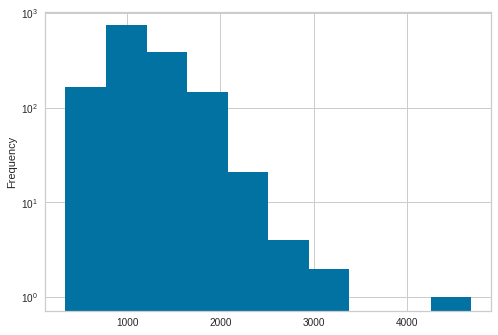

2ndFlrSF


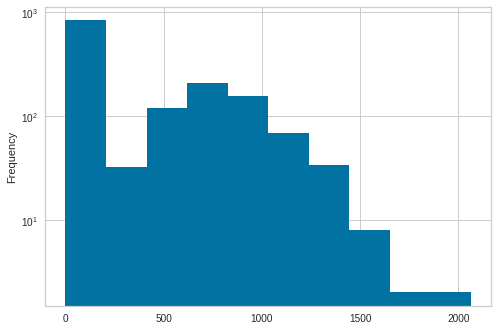

LowQualFinSF


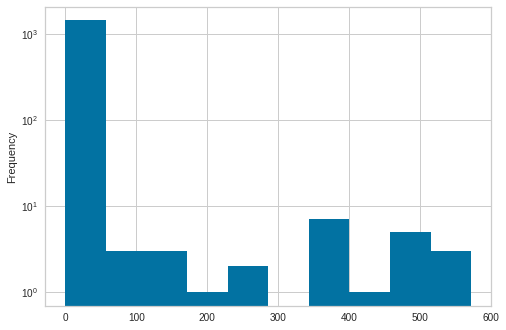

GrLivArea


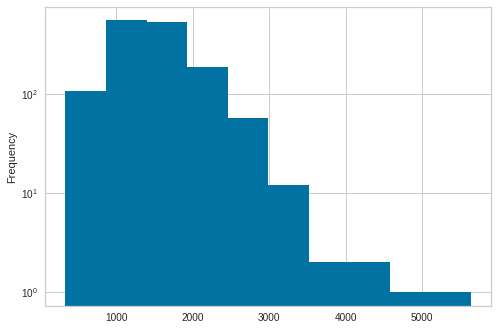

BsmtFullBath


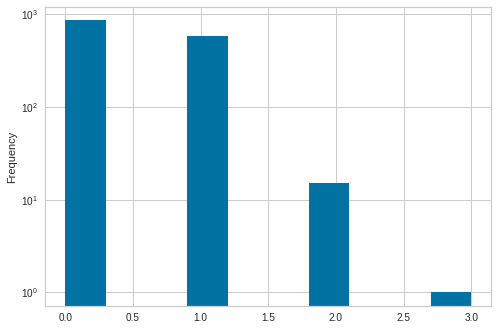

BsmtHalfBath


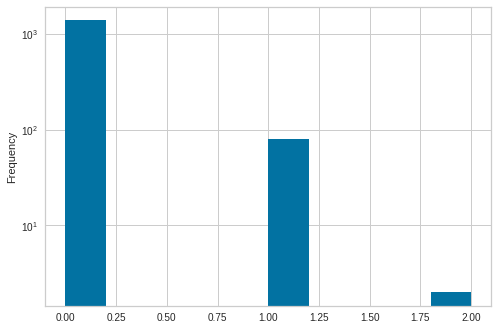

FullBath


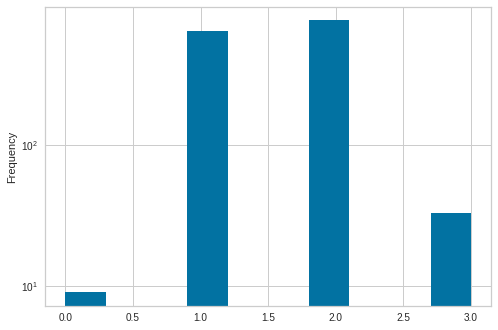

HalfBath


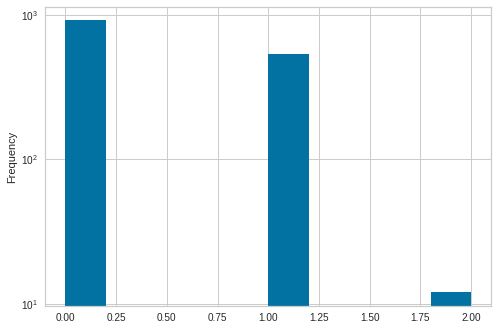

BedroomAbvGr


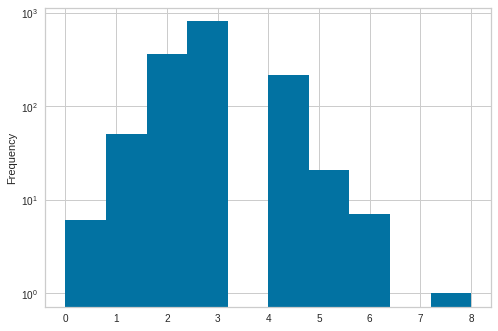

KitchenAbvGr


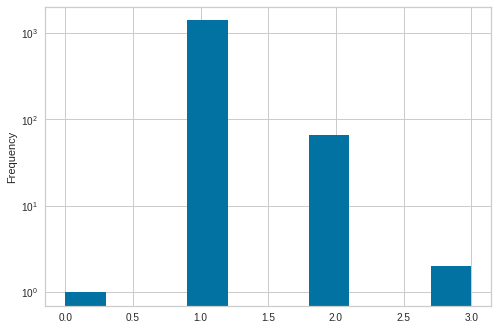

TotRmsAbvGrd


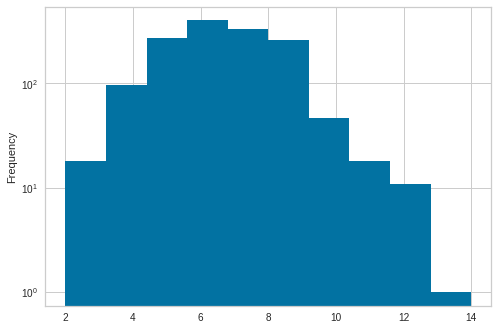

Fireplaces


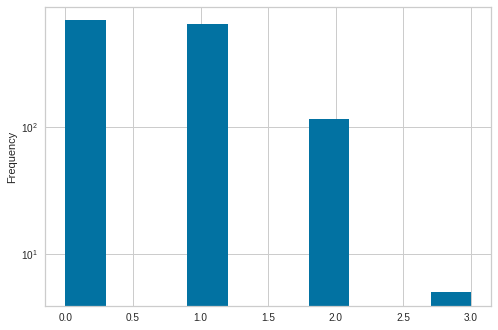

GarageCars


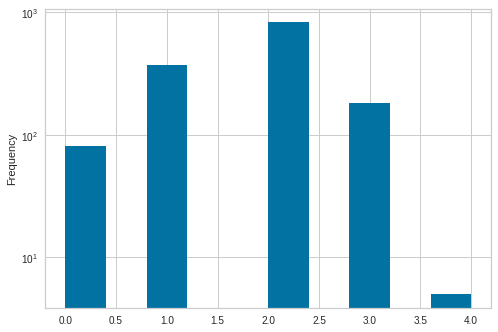

GarageArea


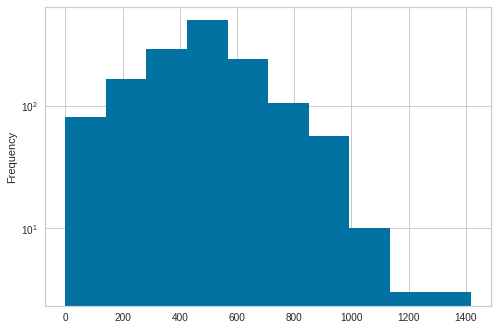

WoodDeckSF


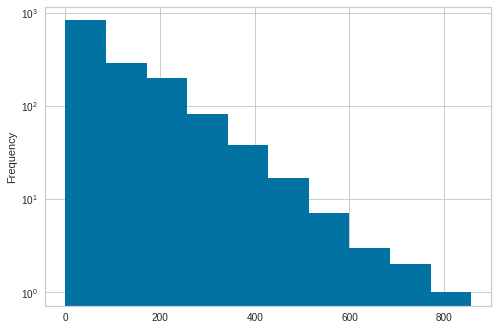

OpenPorchSF


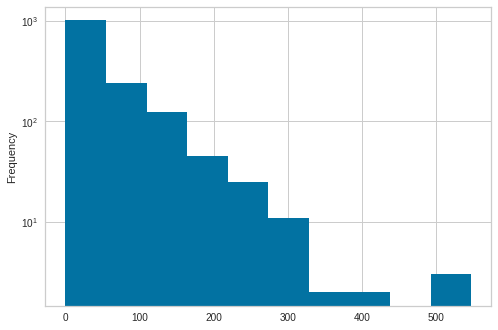

EnclosedPorch


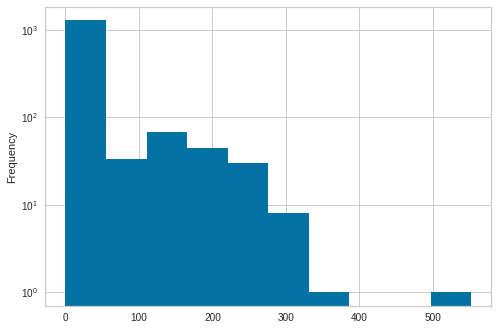

3SsnPorch


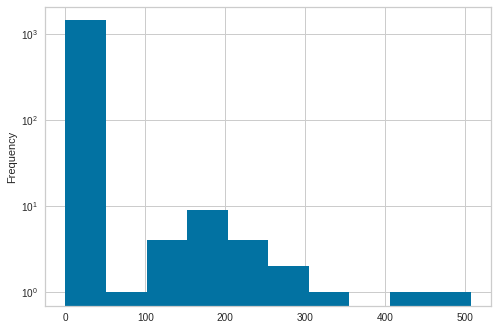

ScreenPorch


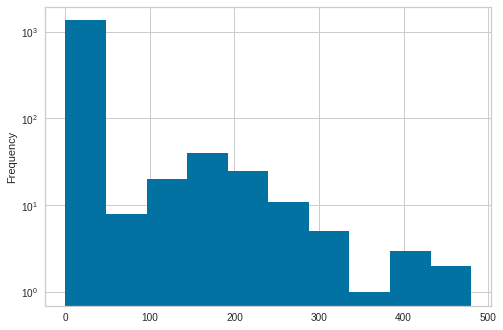

PoolArea


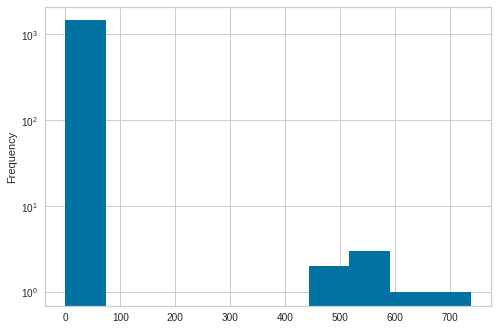

MiscVal


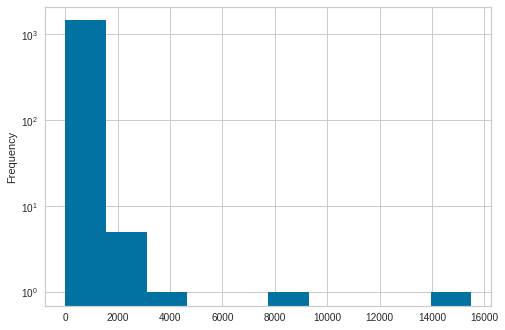

MoSold


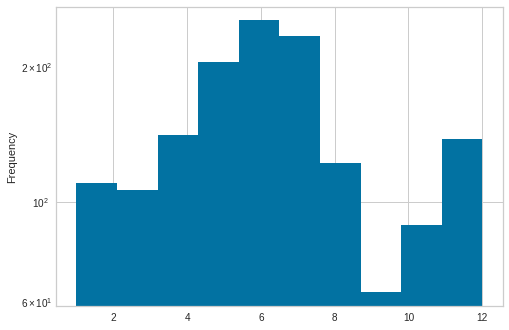

YrSold


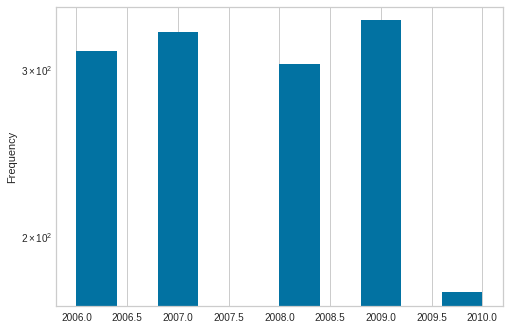

SalePrice


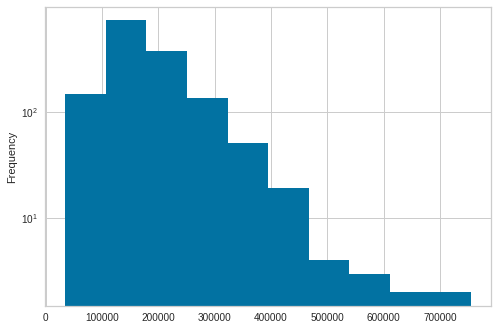

In [20]:
for i in completas_numericas.index:
    print(i)
    df[i].plot(kind='hist', log=True);
    plt.show()

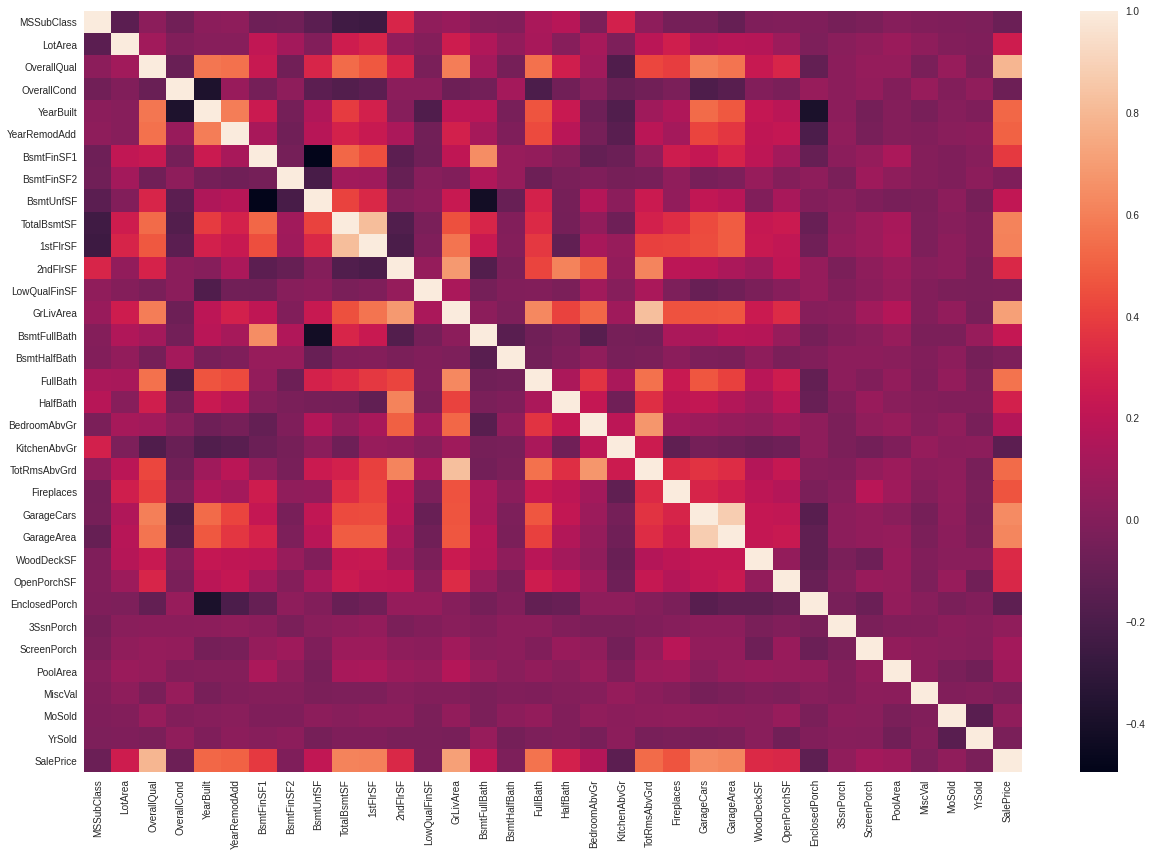

In [21]:
plt.figure(figsize=(21, 14))
sns.heatmap(df[completas_numericas.index].corr())
plt.show()

In [22]:
baseline = df[completas_numericas.index]
baseline.head()

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60,8450,7,5,2003,2003,706,0,150,856,...,0,61,0,0,0,0,0,2,2008,208500
1,20,9600,6,8,1976,1976,978,0,284,1262,...,298,0,0,0,0,0,0,5,2007,181500
2,60,11250,7,5,2001,2002,486,0,434,920,...,0,42,0,0,0,0,0,9,2008,223500
3,70,9550,7,5,1915,1970,216,0,540,756,...,0,35,272,0,0,0,0,2,2006,140000
4,60,14260,8,5,2000,2000,655,0,490,1145,...,192,84,0,0,0,0,0,12,2008,250000


### Separando dados para treino

Geralmente, a coluna que vc deseja prever é vista como seu **target**, e é guardado numa variável como um *vetor*

O restante dos dados é visto como uma matriz de coeficientes, mas **sem** a coluna alvo

In [23]:
y_treino = baseline['SalePrice']
x_treino = baseline.drop(columns='SalePrice')

In [24]:
visualizador = ybf.Rank1D(algorithm='shapiro')

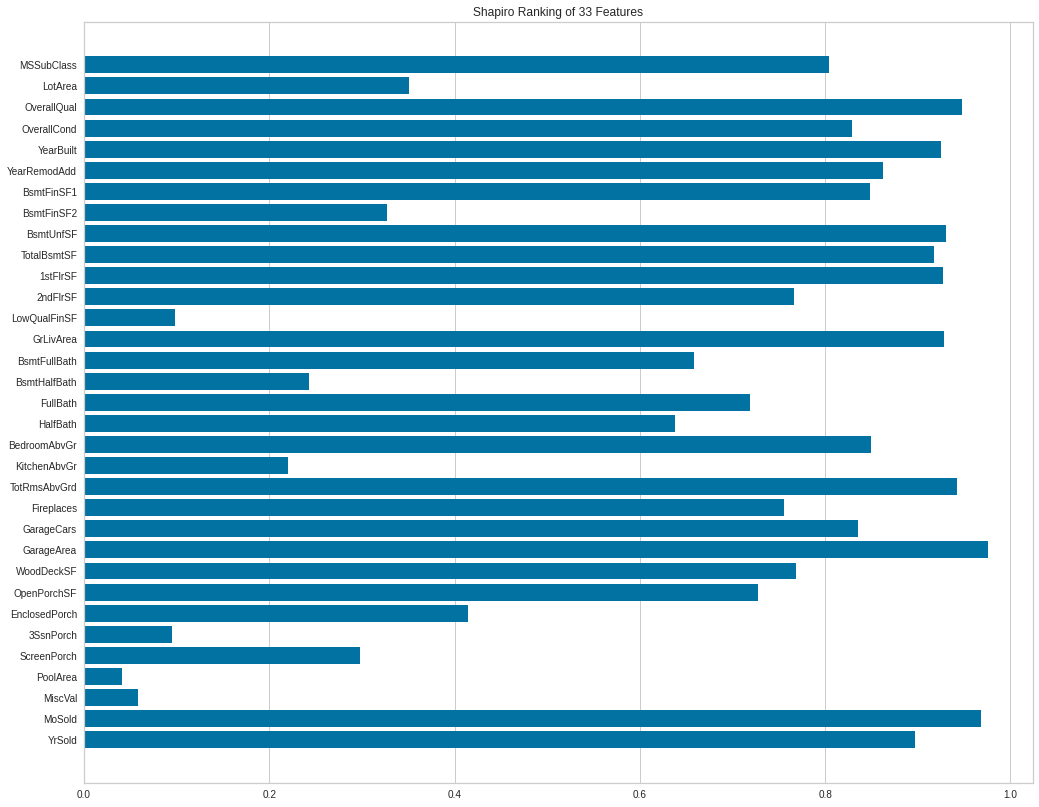

In [25]:
plt.figure(figsize=(17, 14))
visualizador.fit(x_treino, y_treino)
visualizador.transform(x_treino)
visualizador.show()

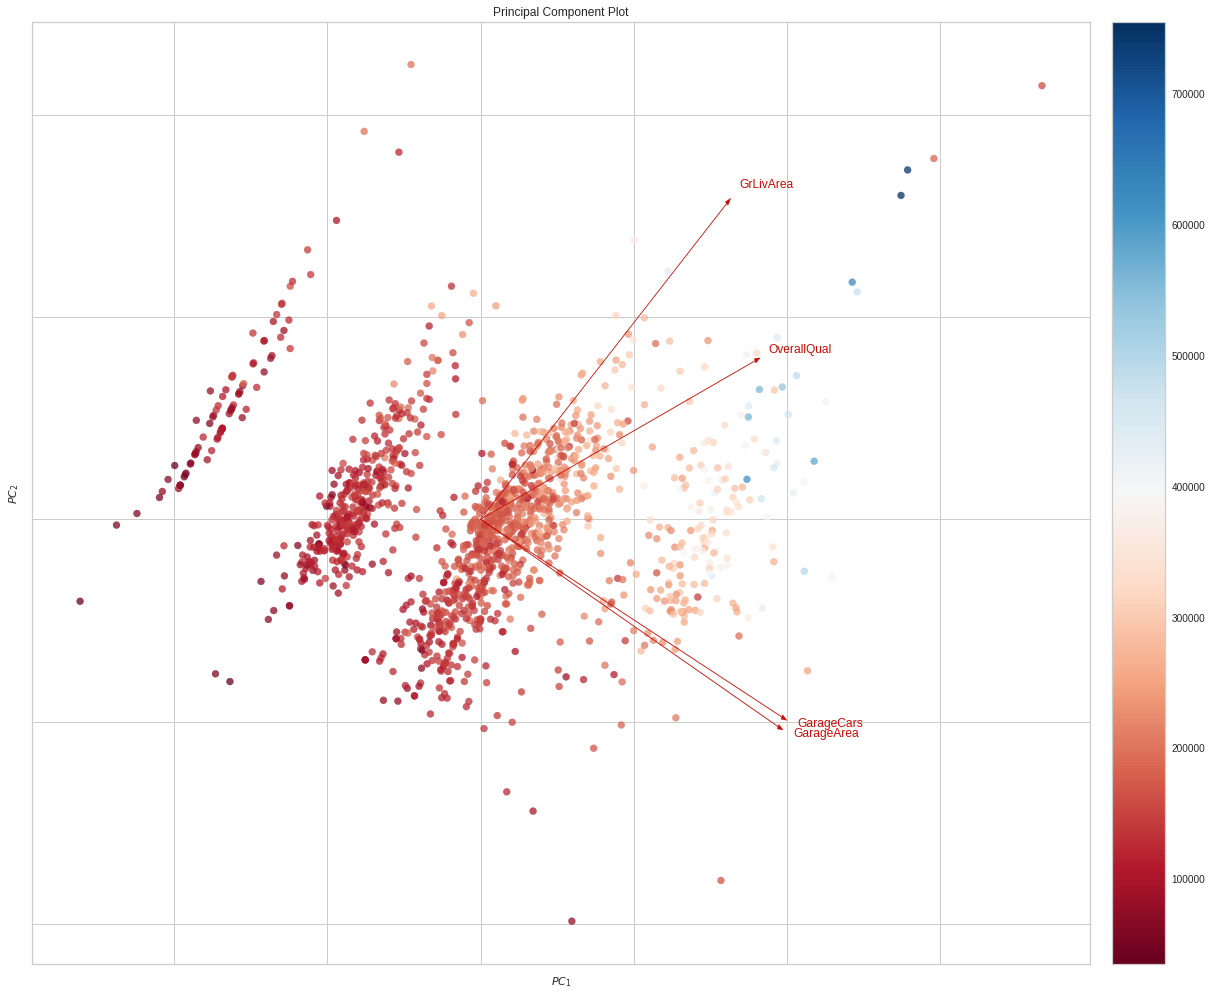

In [26]:
plt.figure(figsize=(17, 14))
visualizador_dois = ybf.PCA(scale=True, proj_features=True, projection=2)
visualizador_dois.fit_transform(x_treino[['GarageArea', 'GarageCars', 'GrLivArea', 'OverallQual']], y_treino)
visualizador_dois.show()

In [84]:
features = x_treino.columns

/home/mikael/projetos_python/aceleradev/venv/lib/python3.8/site-packages/sklearn/base.py:209: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  warnings.warn('From version 0.24, get_params will raise an '


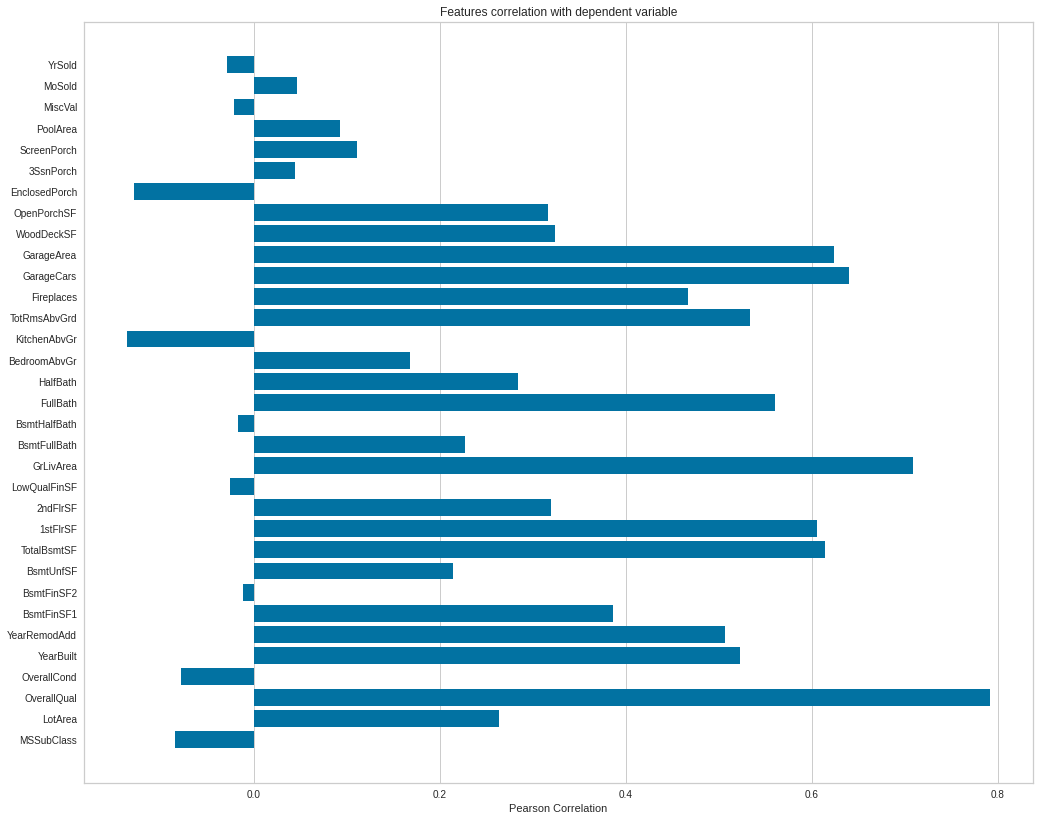

In [28]:
plt.figure(figsize=(17, 14))
visualizador_tres = ybt.FeatureCorrelation(labels=features)
visualizador_tres.fit(x_treino, y_treino)
visualizador_tres.show()

### Treinando Modelo

**Nota:** Nunca faça **fit** com os dados de **TESTE**

Tendo algumas *features* escolhidas do **base line**, podemos treinar um modelo de regressão linear

Perceba que estamos usando a abordagem de **Selecionista** para escolher as colunas que julgamos as melhores. E como métrica para a escolha, olhamos para o $r^2$ e a completude dos dados, haja visto que usamos somente features que possuem 100% dos dados preenchidos

In [29]:
escolhidas = ['GarageArea', 'GarageCars', 'GrLivArea', 'OverallQual']

In [30]:
reg = skl.linear_model.LinearRegression()

In [31]:
reg.fit(x_treino[escolhidas], y_treino)

LinearRegression()

Com o modelo treinado com as colunas escolhidas, podemos importar os dados de teste

In [32]:
y_teste = pd.read_csv('sample_submission.csv', usecols=['SalePrice'])
x_teste = pd.read_csv('test.csv', usecols=['GarageArea', 'GarageCars', 'GrLivArea', 'OverallQual'])

In [33]:
y_teste.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   SalePrice  1459 non-null   float64
dtypes: float64(1)
memory usage: 11.5 KB


In [34]:
x_teste.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   OverallQual  1459 non-null   int64  
 1   GrLivArea    1459 non-null   int64  
 2   GarageCars   1458 non-null   float64
 3   GarageArea   1458 non-null   float64
dtypes: float64(2), int64(2)
memory usage: 45.7 KB


Como é possível perceber, no set de teste existem alguns valores faltantes. Diante disso, devemos lidar com eles

In [35]:
x_teste['GarageCars'].fillna(x_teste['GarageCars'].mean(), inplace=True)

In [36]:
x_teste['GarageArea'].fillna(x_teste['GarageArea'].mean(), inplace=True)

In [37]:
y_previsao = reg.predict(x_teste)

Agora que temos um vetor previsto pelo modelo treinado e o set de teste, podemos compará-lo

In [38]:
erro_normal = skl.metrics.mean_squared_error(y_pred=y_previsao, y_true=y_teste)
erro_normal

955266118717882.1

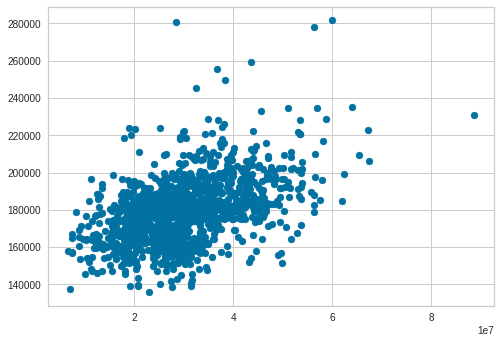

In [39]:
plt.scatter(y_previsao, y_teste)
plt.show()

Tanto pelo erro normal, quanto pelo gráfico, percebe-se que o modelo está ruim. Portanto, a escolha daquelas features foi equivocada.

Para auxiliar na escolha de features melhores, podemos usar outra abordagem **Selecionista**, que é o **RFE (Recursive Feature Elimination)**. E para fazer isso, a biblioteca sklearn possui uma função específica

In [58]:
reg_dois = skl.linear_model.LinearRegression()

In [59]:
reg_dois.fit(x_treino, y_treino)

LinearRegression()

In [60]:
rfe = skl.feature_selection.RFE(reg_dois)

In [61]:
rfe.fit(x_treino, y_treino)

RFE(estimator=LinearRegression())

In [62]:
pd.DataFrame({'colunas': x_treino.columns,
             'bool': rfe.get_support(),
             'coeficientes': reg_dois.coef_})

,colunas,bool,coeficientes
0,MSSubClass,False,-162.672852
1,LotArea,False,0.396228
2,OverallQual,True,17905.067194
3,OverallCond,True,4418.794796
4,YearBuilt,True,346.653503
5,YearRemodAdd,False,137.073924
6,BsmtFinSF1,False,11.833598
7,BsmtFinSF2,False,-2.728260
8,BsmtUnfSF,False,0.787735
9,TotalBsmtSF,False,9.893072


com a função RFE, podemos ver quais features o sklearn vai escolher treinar um novo modelo. Elas são as 'True'

com um modelo de classificação feito (RFE), podemos transformar as variáveis de treino com rfe.transform(). Isso faz com que as novas variáveis tenham os parâmetros que o RFE escolheu

In [63]:
x_treino_importance = rfe.transform(x_treino)

In [92]:
x_treino_importance_features = x_treino.columns[rfe.get_support()]

In [64]:
x_teste_dois = pd.read_csv('test.csv', usecols=x_treino.columns)

In [65]:
for i in x_teste_dois.columns:
    x_teste_dois[i].fillna(x_teste_dois[i].mean(), inplace=True)

In [66]:
x_teste_importance = rfe.transform(x_teste_dois)

Com elas transformadas, podemos treinar um novo modelo

In [67]:
reg_tres = skl.linear_model.LinearRegression()

In [68]:
reg_tres.fit(x_treino_importance, y_treino)

LinearRegression()

In [69]:
y_previsao_imp = reg_tres.predict(x_teste_importance)

In [70]:
erro_imp = skl.metrics.mean_squared_error(y_pred=y_previsao_imp, y_true=y_teste)
erro_imp

4622088349.972749

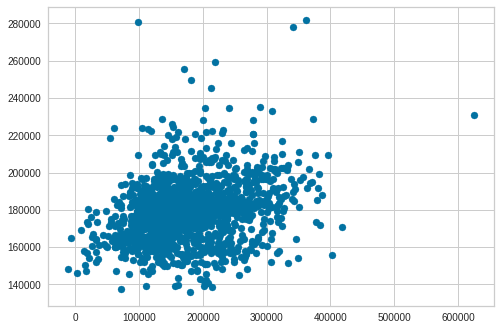

In [71]:
plt.scatter(y_previsao_imp, y_teste)
plt.show()

In [72]:
reg_cinco = skl.linear_model.LinearRegression()

In [73]:
reg_cinco.fit(x_treino_importance, y_treino)

LinearRegression()

In [74]:
rfe_dois = skl.feature_selection.RFE(reg_cinco)

In [80]:
rfe_dois.fit(x_treino_importance, y_treino)

RFE(estimator=LinearRegression())

In [94]:
pd.DataFrame({'colunas': x_treino_importance_features, 
              'bool': rfe_dois.get_support()})

,colunas,bool
0,OverallQual,True
1,OverallCond,False
2,YearBuilt,False
3,1stFlrSF,True
4,2ndFlrSF,True
5,LowQualFinSF,True
6,GrLivArea,True
7,BsmtFullBath,True
8,BsmtHalfBath,False
9,FullBath,False


In [95]:
x_treino_importance_2 = rfe_dois.transform(x_treino_importance)

In [98]:
x_teste_importance_2 = rfe_dois.transform(x_teste_importance)

In [100]:
reg_seis = skl.linear_model.LinearRegression()

In [101]:
reg_seis.fit(x_treino_importance_2, y_treino)

LinearRegression()

In [102]:
y_previsao_imp_2 = reg_seis.predict(x_teste_importance_2)

In [116]:
erro_imp_2 = skl.metrics.mean_squared_error(y_pred=y_previsao_imp_2, y_true=y_teste)
erro_imp_2

4497738396.462442

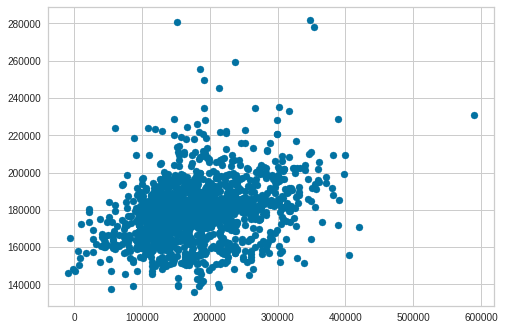

In [117]:
plt.scatter(y_previsao_imp_2, y_teste)
plt.show()

/home/mikael/projetos_python/aceleradev/venv/lib/python3.8/site-packages/sklearn/base.py:209: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  warnings.warn('From version 0.24, get_params will raise an '
/home/mikael/projetos_python/aceleradev/venv/lib/python3.8/site-packages/sklearn/base.py:209: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  warnings.warn('From version 0.24, get_params will raise an '


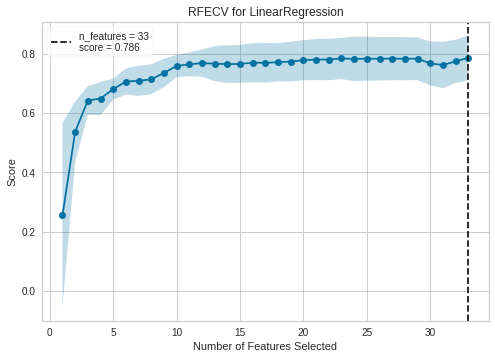

In [200]:
visualizador_quatro = ybm.RFECV(reg_dois)
visualizador_quatro.fit(x_treino, y_treino)
visualizador_quatro.show()  # não esperava esse gráfico, vou refazer depois

Pela abordagem **Selecionista**, vimos por $r^2$ e RFE. Agora, veremos por **Variância Explicada

In [106]:
pca = skl.decomposition.PCA(.95)  # mantém 95% de variância explicada

In [107]:
pca.fit(x_treino)

PCA(n_components=0.95)

In [108]:
pca.explained_variance_ratio_

array([0.98511677])

In [109]:
x_treino_pca = pca.transform(x_treino)

In [110]:
x_teste_pca = pca.transform(x_teste_dois)

In [111]:
reg_quatro = skl.linear_model.LinearRegression()

In [112]:
reg_quatro.fit(x_treino_pca, y_treino)

LinearRegression()

In [113]:
y_previsao_pca = reg_quatro.predict(x_teste_pca)

In [114]:
erro_pca = skl.metrics.mean_squared_error(y_pred=y_previsao_pca, y_true=y_teste)
erro_pca

134744441.0808907

<Figure size 1080x864 with 0 Axes>

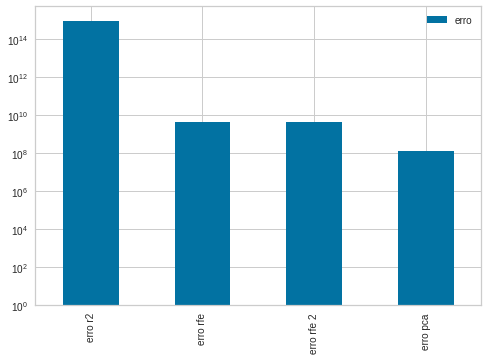

In [115]:
plt.figure(figsize=(15, 12))
pd.DataFrame({'erro': [erro_normal, erro_imp, erro_imp_2, erro_pca]}, index=['erro r2', 'erro rfe', 'erro rfe 2', 'erro pca']).plot(kind='bar', log=True);

Como podemos perceber, comm o gráfico em escala logarítmica, tivemos uma melhora à medida que usamos métodos diferentes de seleção de features. Mas ainda está bem ruim